## Load Libraries

In [1]:
import numpy as np
from pathlib import Path
import os

from src.data.make_dataset import LoadData, AugmentData
from src.visualization.visualize import ClassDistribution, FeatureDistributions, SignalSamplePlot
from src.features.build_features import FeatureExtractor

## Load Data

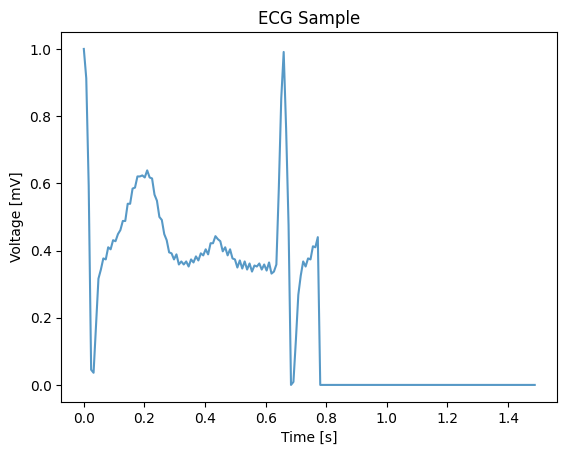

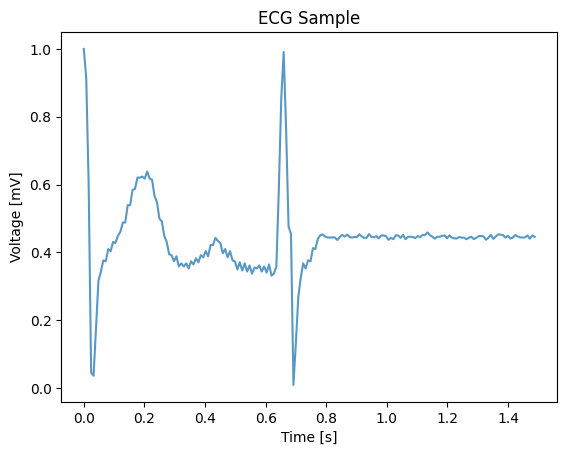

In [2]:
X_raw, X, y, fs = LoadData(raw_path=r'C:\Programming\SickKidsTest\data\raw')
SignalSamplePlot(X=X_raw[13], fs=fs, title='RawSignal', save_dir=r'C:\Programming\SickKidsTest\reports\figures')
SignalSamplePlot(X=X[13], fs=fs, title='ImputedSignal', save_dir=r'C:\Programming\SickKidsTest\reports\figures')

## Analyze Class Distribution

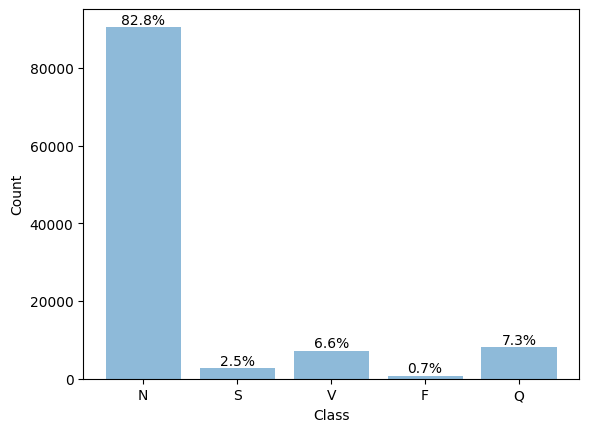

In [3]:
ClassDistribution(y, title='OriginalClassDist', save_dir=r'C:\Programming\SickKidsTest\reports\figures')

## Augment Data

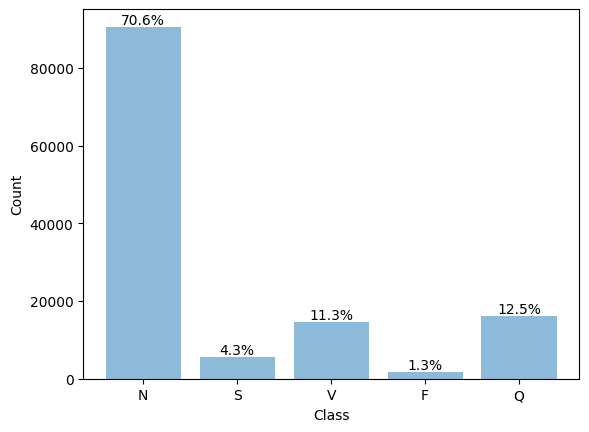

(18857, 186)


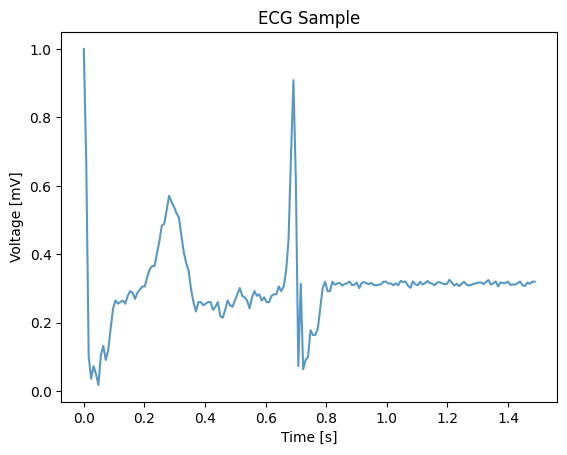

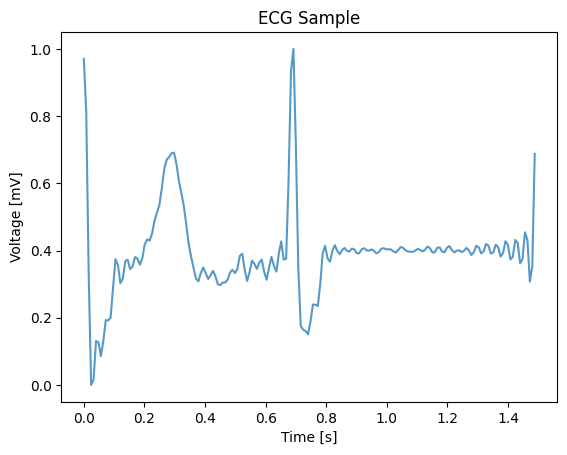

In [4]:
X_aug, y_aug = AugmentData(X, y.flatten(), {0: 0, 1: -1, 2: -1, 3: -1, 4: -1})
ClassDistribution(np.append(y.flatten(), y_aug), title='AugClassDist', save_dir=r'C:\Programming\SickKidsTest\reports\figures')

print(X_aug.shape)
SignalSamplePlot(X=X[np.where(y==1)[0]][0], fs=fs, title='OriginalSignal', save_dir=r'C:\Programming\SickKidsTest\reports\figures')
SignalSamplePlot(X=X_aug[0], fs=fs, title='AugmenetedSignal', save_dir=r'C:\Programming\SickKidsTest\reports\figures')

X = np.vstack((X, X_aug))
y = np.append(y, y_aug)

## Extract Features

In [5]:
featureExtractor = FeatureExtractor()
features = featureExtractor.ExtractFeatures(X, fs)

## Analyze Features

100%|██████████| 26/26 [00:05<00:00,  5.12it/s]


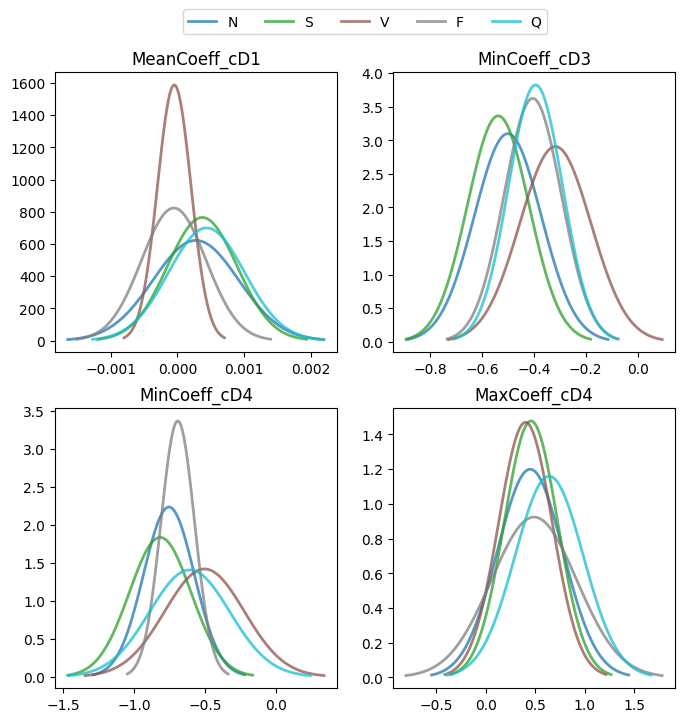

In [8]:
feature_order = featureExtractor.GradeFeatures(features, y.flatten())
FeatureDistributions(y.flatten(), features[feature_order[:4]], 
                     save_dir=r'C:\Programming\SickKidsTest\reports\figures')

## Save Data

In [ ]:
features.to_csv(os.path.join(r'C:\Programming\SickKidsTest\data\processed', 'features.csv'), index=False)
np.savetxt(os.path.join(r'C:\Programming\SickKidsTest\data\processed', 'data_processed.csv'), X, delimiter=',')
np.savetxt(os.path.join(r'C:\Programming\SickKidsTest\data\processed', 'labels_processed.csv'), y, delimiter=',')